# Data Analysis --> Manual vs Automatic

The first part and most imporatnt part of ML model project is to analyze dataset. The analysis may consitis of the following:
-   Types of columns
-   Missing values
-   Distribution of data
-   Transformation of Numeric columns
-   Mapping of categorical columns
... and so on

This step helps in having better understanding of data and also gives more information about strengths of input features.

For this project <b> Titanic dataset</b> shall be used as an example available on kaggle.

# Import libraries

In [28]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Get Data into pandas
## Titanic dataset column information

Column description:
<ol>
<li><b>survival</b> - Survival (0 = No; 1 = Yes)</li>
<li><b>Pclass</b>   - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)</li>
<li><b>name</b>     - Name</li>
<li><b>sex</b>      - Sex</li>
<li><b>age</b>      - Age</li>
<li><b>sibsp</b>    - Number of Siblings/Spouses Aboard</li>
<li><b>parch</b>    - Number of Parents/Children Aboard</li>
<li><b>ticket</b>   - Ticket Number</li>
<li><b>fare</b>     - Passenger Fare</li>
<li><b>cabin</b>    - Cabin</li>
<li><b>embarked</b> - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)​</li>
</ol>



In [84]:
df = pd.read_csv('./Dataset/train.csv')
df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Analysis - Manual
First we start with getting list of categorical and numerical columns. 
Then we can look for missing values and how to deal with them.

## Column types

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Remove PassengerID

In [86]:
# first we can drop PassengerID because it is unique and doesn't contain any special information in terms of ML model training
df.drop('PassengerId', axis=1, inplace=True)
df.head(n=10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Check missing data

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

3 columns have missing data
-   Age
-   Cabin
-   Embarked

In [6]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

df[vars_with_na].isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

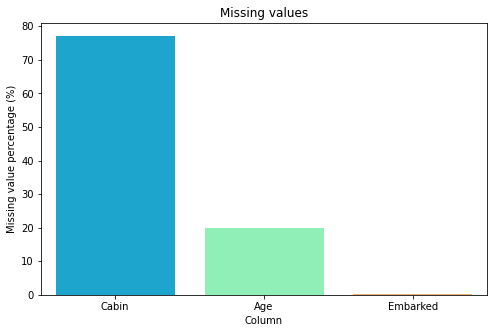

In [25]:
# plot missing values
df_missing = pd.DataFrame(data = df[vars_with_na].isnull().mean().sort_values(ascending=False), columns=['Missing value percentage (%)'])
df_missing.reset_index(inplace=True)
df_missing['Column'] = df_missing['index']
df_missing['Missing value percentage (%)'] = df_missing['Missing value percentage (%)']*100
# df_missing

plt.figure(figsize=(8,5))
sns.barplot(x='Column',y='Missing value percentage (%)',data=df_missing, palette='rainbow')
plt.title("Missing values");

## Relationship between missing data and target i.e. Survived column

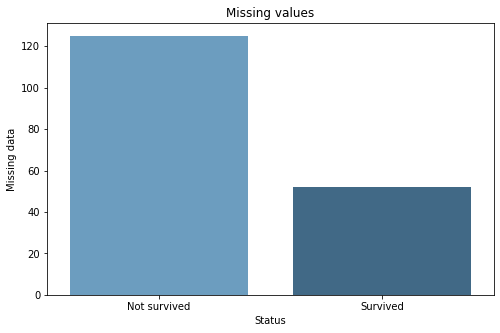

In [152]:
# age missing values distribution
df_test_age = df.copy()
df_test_age['Age'] = np.where(df_test_age['Age'].isnull(), 1, 0)
df_test_age['Age'].groupby(df_test_age.Survived).sum()

# plot
df_missing_age = pd.DataFrame(data = df_test_age['Age'].groupby(df_test_age.Survived).sum())
df_missing_age.reset_index(inplace=True)
df_missing_age.columns = ['Status','Missing data']
df_missing_age.Status = df_missing_age.Status.map({0 : 'Not survived', 1 : 'Survived'})
df_missing_age

# df_missing
plt.figure(figsize=(8,5))
sns.barplot(x='Status',y='Missing data',data=df_missing_age,  palette="Blues_d")
plt.title("Missing values");


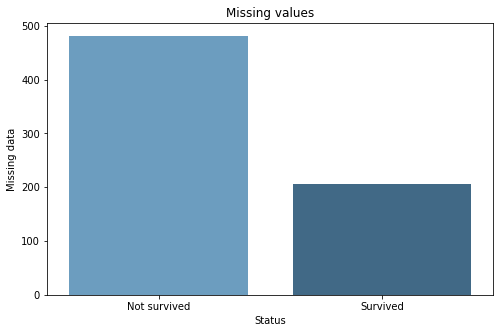

In [153]:
# cabin missing values distribution
df_test_cabin = df.copy()
df_test_cabin['Cabin'] = np.where(df_test_cabin['Cabin'].isnull(), 1, 0)
df_test_cabin['Cabin'].groupby(df_test_cabin.Survived).sum()

# plot
df_missing_cabin = pd.DataFrame(data = df_test_cabin['Cabin'].groupby(df_test_cabin.Survived).sum())
df_missing_cabin.reset_index(inplace=True)
df_missing_cabin.columns = ['Status','Missing data']
df_missing_cabin.Status = df_missing_cabin.Status.map({0 : 'Not survived', 1 : 'Survived'})
df_missing_cabin

# df_missing
plt.figure(figsize=(8,5))
sns.barplot(x='Status',y='Missing data',data=df_missing_cabin,  palette="Blues_d")
plt.title("Missing values");

In both the cases we have seen that data of people who didn't survive are missing.

## Data distribution

### Passengers travelling in different class

In [144]:
# distribution of passengers travelling in class based on sex
df_distribution = df.copy()
df_distribution = pd.crosstab(df_distribution.Pclass,df_distribution.Sex)
df_distribution.reset_index(inplace=True)
df_distribution_melt = pd.melt(df_distribution, id_vars=['Pclass'], value_vars=['male', 'female'])
df_distribution_melt.columns = ['Pclass','Gender', 'Count']
df_distribution_melt

,Pclass,Gender,Count
0,1,male,122
1,2,male,108
2,3,male,347
3,1,female,94
4,2,female,76
5,3,female,144


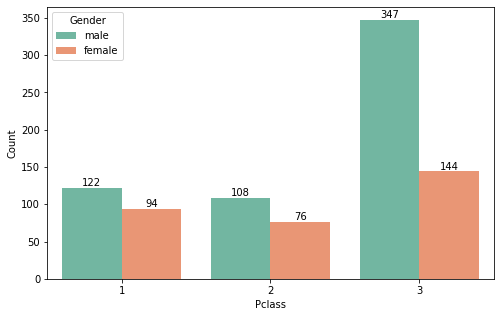

In [145]:
# plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Pclass", hue="Gender", y="Count", data=df_distribution_melt, palette="Set2")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### How many survived?

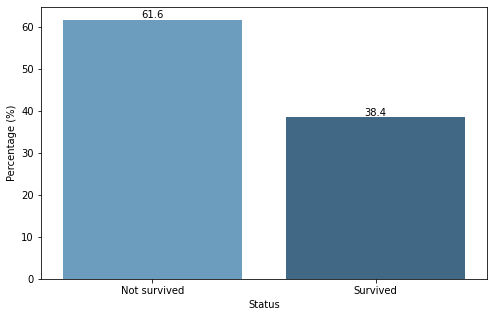

In [122]:
df_survived = pd.DataFrame(data = round(df['Pclass'].groupby(df['Survived']).count()/len(df)*100,1))
df_survived.reset_index(inplace=True)
df_survived.columns = ['Status','Percentage (%)']
df_survived.Status = df_survived.Status.map({0 : 'Not survived', 1 : 'Survived'})
df_survived

# df_missing
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Status',y='Percentage (%)',data=df_survived, palette="Blues_d")
ax.bar_label(ax.containers[0]);

#### 38.4% survived
<ul>
<li>61.6% passengers from given dataset didn't survived</li>
<li>38.4% passengers from given dataset did survive</li>
</ul>

How many female and male survived? 

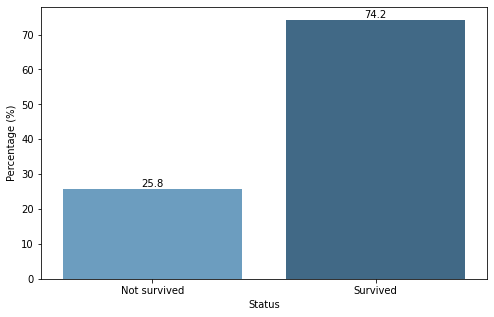

In [123]:
df_female_survived = pd.DataFrame(data = round(df[df.Sex == 'female'].Sex.groupby(df.Survived).count()/len(df[df.Sex == 'female'])*100,1))
df_female_survived.reset_index(inplace=True)
df_female_survived.columns = ['Status','Percentage (%)']
df_female_survived.Status = df_female_survived.Status.map({0 : 'Not survived', 1 : 'Survived'})
df_female_survived

# df_missing
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Status',y='Percentage (%)',data=df_female_survived, palette="Blues_d")
ax.bar_label(ax.containers[0]);

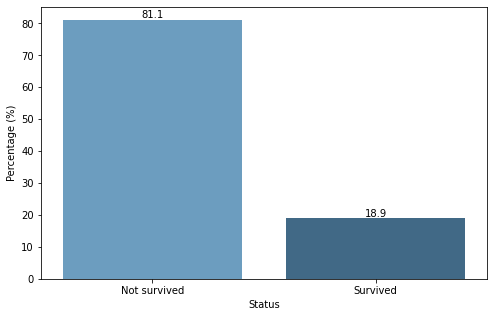

In [125]:
df_male_survived = pd.DataFrame(data = round(df[df.Sex == 'male'].Sex.groupby(df.Survived).count()/len(df[df.Sex == 'male'])*100,1))
df_male_survived.reset_index(inplace=True)
df_male_survived.columns = ['Status','Percentage (%)']
df_male_survived.Status = df_male_survived.Status.map({0 : 'Not survived', 1 : 'Survived'})
df_male_survived

# df_missing
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Status',y='Percentage (%)',data=df_male_survived, palette="Blues_d")
ax.bar_label(ax.containers[0]);

Female survival rate was more than men. Gender can be a good indicator.

Predictibility of Pclass

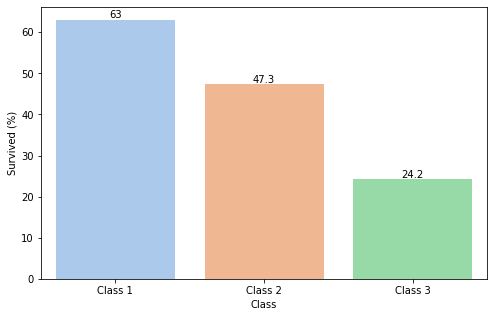

In [136]:
df_class_survived = pd.DataFrame(data = round(df[['Pclass', 'Survived']].groupby(['Pclass']).mean()*100,1))
df_class_survived.reset_index(inplace=True)
df_class_survived.columns = ['Class','Survived (%)']
df_class_survived.Class = df_class_survived.Class.map({1 : 'Class 1', 2 : 'Class 2', 3 : 'Class 3'})
df_class_survived

# df_missing
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Class',y='Survived (%)',data=df_class_survived, palette="pastel")
ax.bar_label(ax.containers[0]);

In [130]:
df_class_survived = pd.DataFrame(data = round(df[['Pclass', 'Survived']].groupby(['Pclass']).mean()*100,1))
df_class_survived.reset_index(inplace=True)
df_class_survived

,Pclass,Survived
0,1,63.0
1,2,47.3
2,3,24.2


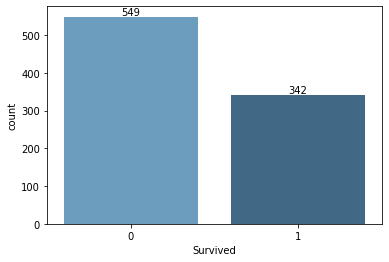

In [161]:
# count
ax = sns.countplot(x=df['Survived'], palette = "Blues_d")
ax.bar_label(ax.containers[0]);

Similary we can see survival rate of first class was more compared to third class

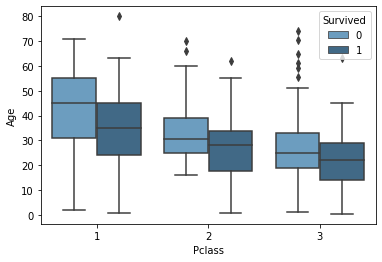

In [148]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df[df.Age.notnull()], palette="Blues_d");

Now, since we already have seen the survival rate of females were higher and class can be a good predictor

Let's check the distribution of continuous variables

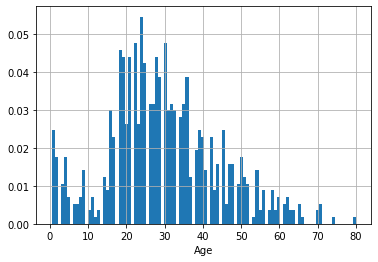

In [158]:
# Age
df['Age'].hist(bins=100, density=True)
plt.xlabel('Age')
plt.show()

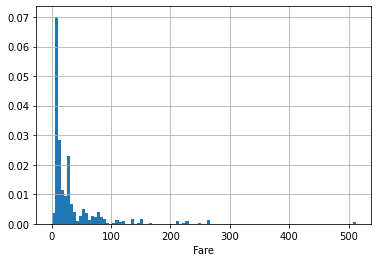

In [157]:
# Fare
df['Fare'].hist(bins=100, density=True)
plt.xlabel('Fare')
plt.show()

In [162]:
# skewness
df['Fare'].skew()

4.787316519674893

### Cardinality Check for categorical variable
how many different categories are present in each of the variables.

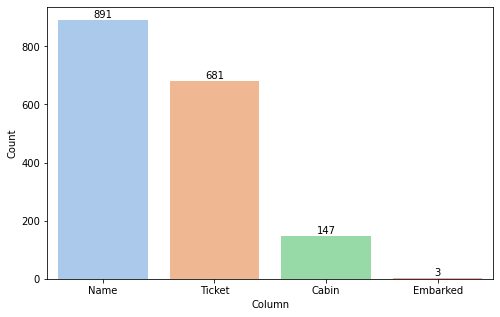

In [168]:
categorical_var = ['Embarked', 'Cabin', 'Ticket', 'Name']
df_column_cardinality = pd.DataFrame(data = df[categorical_var].nunique().sort_values(ascending=False))
df_column_cardinality.reset_index(inplace=True)
df_column_cardinality.columns = ['Column','Count']
df_column_cardinality

# df_missing
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Column',y='Count',data=df_column_cardinality, palette="pastel")
ax.bar_label(ax.containers[0]);

Naturally Name and Ticket shall be unique and hence will have high cardinality
Whereas Embarked is low

In [171]:
# Unique embarked
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Let's look at the distribution of ordinal variables

-   Pclass
-   SibSp
-   Parch

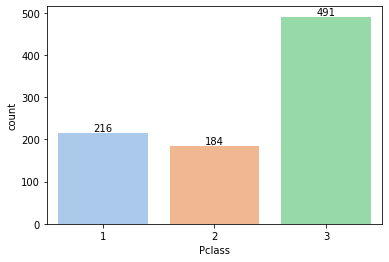

In [173]:
# count
ax = sns.countplot(x=df['Pclass'], palette = "pastel")
ax.bar_label(ax.containers[0]);

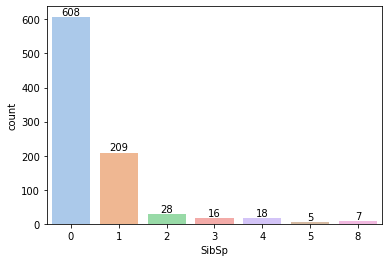

In [174]:
# count
ax = sns.countplot(x=df['SibSp'], palette = "pastel")
ax.bar_label(ax.containers[0]);

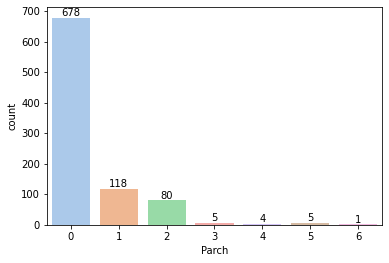

In [175]:
# count
ax = sns.countplot(x=df['Parch'], palette = "pastel")
ax.bar_label(ax.containers[0]);

### From initial analysis we have found the following
-   3 columns with missimg values
-   Cabin has more than 70% missing data --> Maybe we can neglect it
-   Fare is highly skewed (Positive)
-   Survival rate of female was much higher than male
-   Age, Class, Gender shows promising prediciton power
-   Embarked has 3 unique categories
-   Descreet variables are skewed also

Let's use paorplot from seaborn to see correlation 

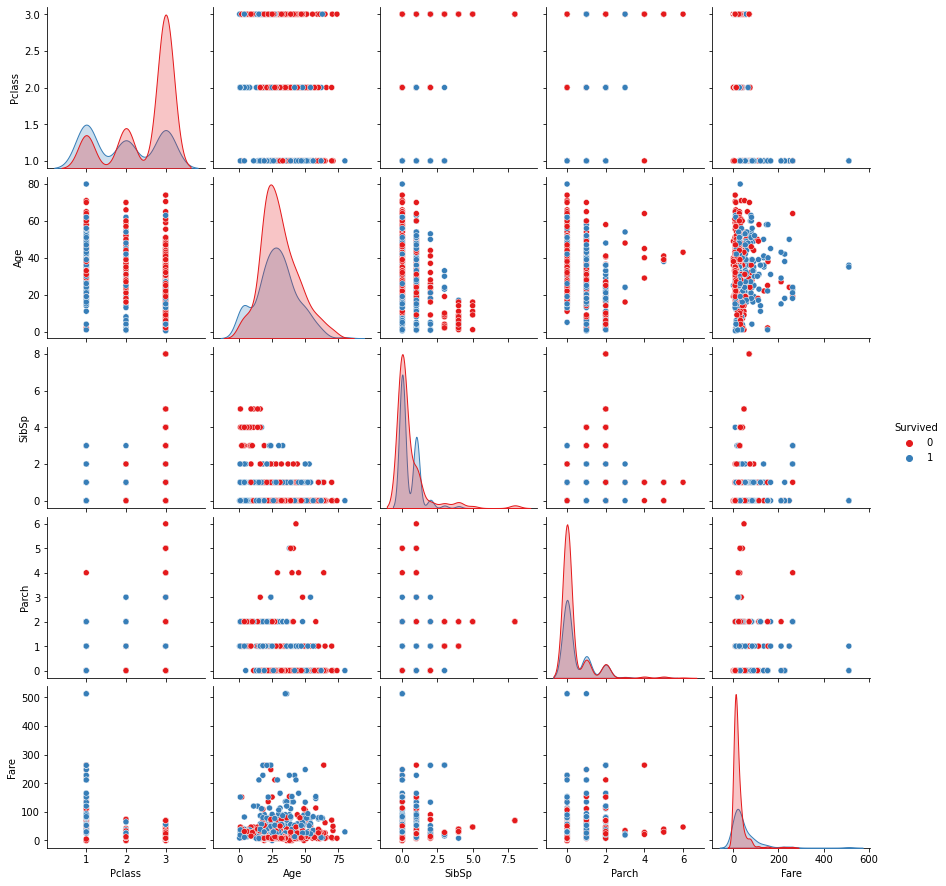

In [180]:
df_pairplot = df.copy()
sns.pairplot(df_pairplot ,hue="Survived", palette='Set1');

# Data Analysis - Automatic EDA Libraries
-   Mito
-   Dataprep
-   Pandas profiling
-   Sweetviz
-   Autoviz

# Mito

## Mito

Code generated from Mito

Want to test if Mito can replace the tideous work of writing code from scratch

Following things I will check and try to reproduce:
### From initial analysis we have found the following
-   3 columns with missimg values
-   Cabin has more than 70% missing data --> Maybe we can neglect it
-   Fare is highly skewed (Positive)
-   Survival rate of female was much higher than male
-   Age, Class, Gender shows promising prediciton power
-   Embarked has 3 unique categories
-   Descreet variables are skewed also

### Graphs
-   Relation between missing data vs survived
-   Male and female count in each class
-   Percentage of passenger survived
-   Female survival rate
-   Male survival rate
-   Passenger survived in each class
-   Age and Fare distribution
-   Cardinality check - 'Embarked', 'Cabin', 'Ticket', 'Name'
-   Ordinal values check - Pclass,  SibSp,   Parch

In [ ]:
from mitosheet import * # Import necessary functions from Mito
register_analysis('') # Let Mito know which analysis is being run

# Imported .\train.csv
import pandas as pd
train_csv = pd.read_csv(r'.\train.csv')

# Added column new-column-illi to train_csv
train_csv.insert(6, 'new-column-illi', 0)

# Renamed new-column-illi to Age_Dummy in train_csv
train_csv.rename(columns={"new-column-illi": "Age_Dummy"}, inplace=True)

# Set new-column-illi in train_csv to = if(Age == 'NaN', 0,1) 
train_csv['Age_Dummy'] =  IF(train_csv['Age'] == 'NaN', 0,1)

# Sorted Age in train_csv in ascending order
train_csv = train_csv.sort_values(by='Age', ascending=True, na_position='first')

# Set new-column-illi in train_csv to = if(Age>0, 1,0) 
train_csv['Age_Dummy'] =  IF(train_csv['Age']>0, 1,0)

# Sorted Age in train_csv in descending order
train_csv = train_csv.sort_values(by='Age', ascending=False, na_position='last')

# Pivoted train_csv into df2
unused_columns = train_csv.columns.difference(set(['Age_Dummy']).union(set(['Survived'])).union(set({'Survived'})))
tmp_df = train_csv.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['Age_Dummy'],
    columns=['Survived'],
    values=['Survived'],
    aggfunc={'Survived': ['count']}
)

# Flatten the column headers
pivot_table.columns = [flatten_column_header(col) for col in pivot_table.columns.values]

# Reset the column name and the indexes
df2 = pivot_table.reset_index()

# Pivoted train_csv into df3
unused_columns = train_csv.columns.difference(set(['Pclass']).union(set(['Survived'])).union(set({'PassengerId'})))
tmp_df = train_csv.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['Pclass'],
    columns=['Survived'],
    values=['PassengerId'],
    aggfunc={'PassengerId': ['count']}
)

# Flatten the column headers
pivot_table.columns = [flatten_column_header(col) for col in pivot_table.columns.values]

# Reset the column name and the indexes
df3 = pivot_table.reset_index()

# Pivoted train_csv into df4
unused_columns = train_csv.columns.difference(set(['Sex']).union(set(['Survived'])).union(set({'PassengerId'})))
tmp_df = train_csv.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['Sex'],
    columns=['Survived'],
    values=['PassengerId'],
    aggfunc={'PassengerId': ['count']}
)

# Flatten the column headers
pivot_table.columns = [flatten_column_header(col) for col in pivot_table.columns.values]

# Reset the column name and the indexes
df4 = pivot_table.reset_index()

# Pivoted train_csv into df5
df5 = pd.DataFrame(data={})

# Pivoted train_csv into df5
unused_columns = train_csv.columns.difference(set([]).union(set(['Embarked'])).union(set({'PassengerId'})))
tmp_df = train_csv.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    columns=['Embarked'],
    values=['PassengerId'],
    aggfunc={'PassengerId': [pd.Series.nunique]}
)

# Flatten the column headers
pivot_table.columns = [flatten_column_header(col) for col in pivot_table.columns.values]

# Reset the column name and the indexes
df5 = pivot_table.reset_index()

# Pivoted train_csv into df5
unused_columns = train_csv.columns.difference(set(['Embarked']).union(set([])).union(set({'PassengerId'})))
tmp_df = train_csv.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['Embarked'],
    values=['PassengerId'],
    aggfunc={'PassengerId': [pd.Series.nunique]}
)

# Flatten the column headers
pivot_table.columns = [flatten_column_header(col) for col in pivot_table.columns.values]

# Reset the column name and the indexes
df5 = pivot_table.reset_index()

# Pivoted train_csv into df6
df6 = pd.DataFrame(data={})

# Deleted dataframe df6
del df6

# Pivoted train_csv into df6
unused_columns = train_csv.columns.difference(set(['Name']).union(set([])).union(set({'Name'})))
tmp_df = train_csv.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['Name'],
    values=['Name'],
    aggfunc={'Name': [pd.Series.nunique]}
)

# Flatten the column headers
pivot_table.columns = [flatten_column_header(col) for col in pivot_table.columns.values]

# Reset the column name and the indexes
df6 = pivot_table.reset_index()

# Deleted dataframe df6
del df6

# Pivoted train_csv into df6
unused_columns = train_csv.columns.difference(set(['Pclass']).union(set(['Age_Dummy'])).union(set({'Survived'})))
tmp_df = train_csv.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['Pclass'],
    columns=['Age_Dummy'],
    values=['Survived'],
    aggfunc={'Survived': ['count']}
)

# Flatten the column headers
pivot_table.columns = [flatten_column_header(col) for col in pivot_table.columns.values]

# Reset the column name and the indexes
df6 = pivot_table.reset_index()

  
# MITO CODE END (DO NOT EDIT)

# Dataprep

In [ ]:
from dataprep.eda import create_report
df = pd.read_csv('train.csv')
report = create_report(df, title='Titanic report')

In [ ]:
from dataprep.eda import plot
plot(df)

# Pandas Profiling

In [235]:
from pandas_profiling import ProfileReport

In [236]:
report = ProfileReport(df)

In [237]:
report

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


# SweetViz

In [238]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report analyze.html was generated.


# Autoviz

In [239]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

ModuleNotFoundError: No module named 'autoviz'

In [ ]:
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=2000,
    max_cols_analyzed=20,
)